## computer vision libraries in Pytorch
`torchvision`
`torchvision.datasets`
`torchvision.models`
`torchvision.transforms`
`torch.utils.data.Dataset`
`torch.utils.data.DataLoader`






In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


In [2]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.89MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 63.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.8MB/s]


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
image,label=train_data[0]
image.shape,image,label

(torch.Size([1, 28, 28]),
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_index=train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

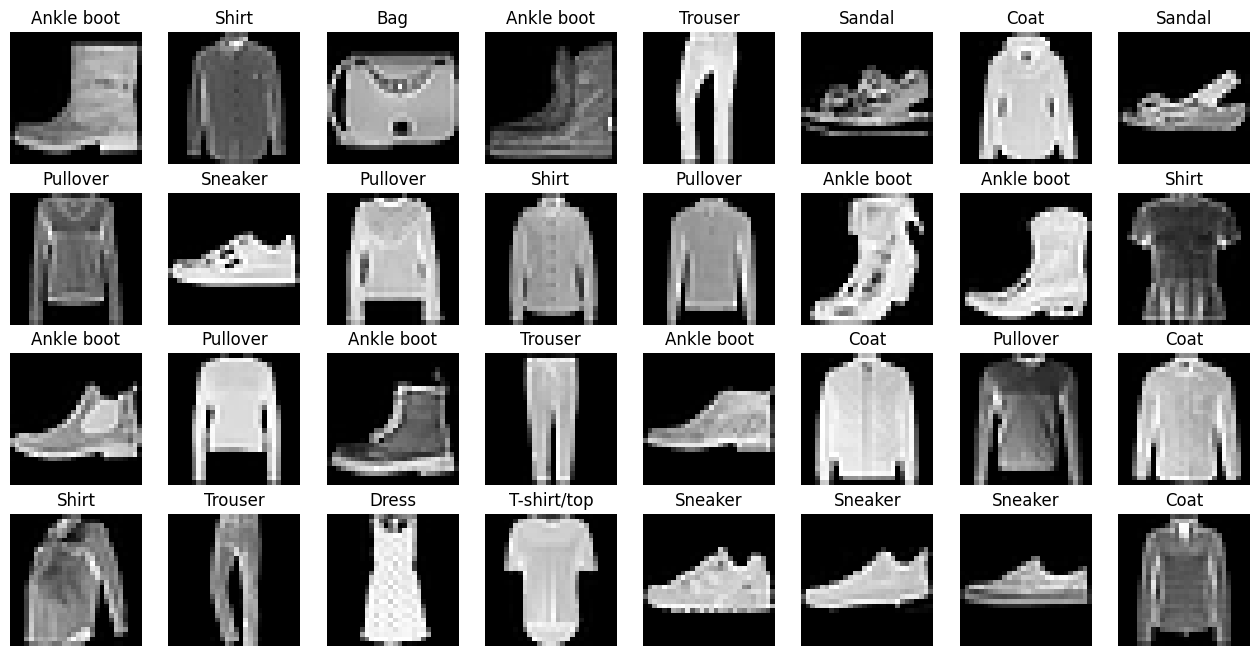

In [7]:
torch.manual_seed(42)
fig=plt.figure(figsize=(16,8))
rows,cols=4,8
for i in range(1,cols*rows+1):
  rd_index=torch.randint(0,len(train_data),size=[1]).item()
  image,label=train_data[rd_index]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [8]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x79d10bdd7680>,
 <torch.utils.data.dataloader.DataLoader at 0x79d10be344a0>)

In [9]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size:torch.Size([1, 28, 28])
Label:7,label size:torch.Size([])


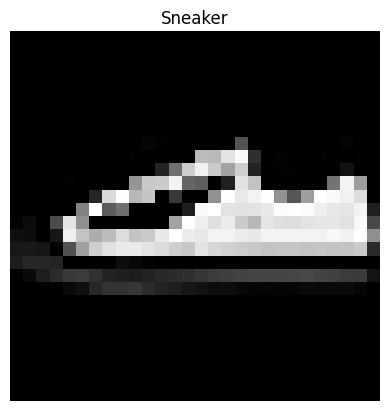

In [10]:
torch.manual_seed(42)
random_index=torch.randint(0,len(train_features_batch),size=[1]).item()
image,label=train_features_batch[random_index],train_labels_batch[random_index]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size:{image.shape}")
print(f"Label:{label},label size:{label.shape}")

In [11]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
new=flatten_model(x)
# print(f"shape of x: {x.shape}")
# print(x)
print(f"shape of new : {new.shape}")
# print(new)

shape of new : torch.Size([1, 784])


In [12]:
class Model_0(nn.Module):
  def __init__(self,input_shape:int
               ,hidden_units :int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape))

  def forward(self,x):
    return self.layer_stack(x)

In [13]:
torch.manual_seed(42)
model_0=Model_0(input_shape=784,
                hidden_units=10,
                output_shape=len(class_names)).to("cpu")
model_0

Model_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [15]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [16]:
from timeit import default_timer as timer

def print_train_time(start:float,end:float,
                     device:torch.device=None):
  """Prints difference between start and end of training"""

  total_time=end-start
  print(f"Train time on device {device} :{total_time:.3f} seconds")
  return total_time

In [17]:
start_time=timer()
#smthng
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on device cpu :0.000 seconds


2.8315000008660718e-05

WRITING THE TRAINING AND TESTING LOOP

In [18]:
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")

  train_loss=0

  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred=model_0(X)
    #Calculate losss per batch
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    #Optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    optimizer.step()

    if batch% 400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")



  train_loss/=len(train_dataloader)

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  print(f"Train loss:{train_loss:.5f} | Test loss:{test_loss:.5f} | Test acc:{test_acc:.5f}")

end_time_on_cpu=timer()
total_time_on_cpu=print_train_time(start=start_time_on_cpu,end=end_time_on_cpu,device="cpu")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.59039 | Test loss:0.50954 | Test acc:82.03874
Epoch:1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.47633 | Test loss:0.47989 | Test acc:83.19688
Epoch:2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.45503 | Test loss:0.47664 | Test acc:83.42652
Train time on device cpu :27.461 seconds


In [28]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:

      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


model_0_results=eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'Model_0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [20]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
class Model_1(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.stack_layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.stack_layer(x)

In [22]:
torch.manual_seed(42)
model_1=Model_1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [23]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [24]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               optimizer:torch.optim.Optimizer,
               device:torch.device
               ):
  train_loss,train_acc=0,0
  model_1.train()
  for batch,(X,y) in enumerate(dataloader):
    #send data to GPU
    X,y=X.to(device),y.to(device)
    #forward pass
    y_pred=model_1(X)
    #calculate loss fr each image in a batch
    loss=loss_fn(y_pred,y)
    acc=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    train_loss+=loss
    train_acc+=acc

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss/=len(dataloader)
  train_acc/=len(dataloader)

  print(f"Train loss: {train_loss:.5f} / Train Accuracy :{train_acc:.2f}%")



def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device):
  test_loss,test_acc=0,0
  model.eval()

  with torch.inference_mode():
    for X,y in dataloader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(dataloader)
    test_acc/=len(dataloader)

  print(f"Test loss: {test_loss:.5f} / Test Accuracy :{test_acc:.2f}%")


In [25]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(dataloader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,device=device
    )
    test_step(dataloader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,device=device
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 / Train Accuracy :61.34%
Test loss: 0.95636 / Test Accuracy :65.00%
Epoch: 1
---------
Train loss: 0.78101 / Train Accuracy :71.93%
Test loss: 0.72227 / Test Accuracy :73.91%
Epoch: 2
---------
Train loss: 0.67027 / Train Accuracy :75.94%
Test loss: 0.68500 / Test Accuracy :75.02%
Train time on device cuda :29.348 seconds


In [30]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


# model_0_results=eval_model(model=model_0,
#                              data_loader=test_dataloader,
#                              loss_fn=loss_fn,
#                              accuracy_fn=accuracy_fn,device=device)
# model_0_results

In [32]:
model_1_results=eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,device=device)
model_1_results

{'model_name': 'Model_1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [33]:
model_0_results

{'model_name': 'Model_0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}